In [1]:
import tensorflow as tf
import jax
from jax import numpy as jnp
import sklearn
from matplotlib import pyplot as plt
from matplotlib.widgets import Button, Slider
import sklearn.datasets as skds

2025-01-30 16:06:19.293493: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [32]:
sr_points, sr_color = skds.make_swiss_roll(100000, noise=0.3)
ds_points = jnp.array(sr_points, jnp.float32)
ds_color = jnp.where(sr_color > 12, 1, 0)

In [6]:
fig, ax = plt.subplots()

ax.scatter(ds_points[:, 0], ds_points[:, 2], c=ds_color)
plt.show()

In [33]:
ds_points_shape = ds_points[:, jnp.newaxis, jnp.newaxis, :]
ds_points_shape.shape

(100000, 1, 1, 3)

In [34]:
dataset_swirl = {'image': ds_points_shape, 'label': jnp.array(ds_color, dtype=jnp.int32)}
ds_swirl = tf.data.Dataset.from_tensor_slices(dataset_swirl)
tf.data.experimental.save(ds_swirl, '../datasets/swirl/data')

In [30]:
spec = {'image': tf.TensorSpec(shape=(1, 1, 3), dtype=tf.float32, name=None),
            'label': tf.TensorSpec(shape=(), dtype=tf.int32, name=None)}
swirl_ds = tf.data.experimental.load('../datasets/swirl/data', spec)

In [14]:
temp = ds_points[:1000]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(temp[:, 0], temp[:, 1], temp[:, 2], c=ds_color[:1000])
plt.show()

In [4]:
points = []
while len(points) < 100000:
    p = tf.random.uniform((1, 1, 2), -1, 1)
    if tf.math.reduce_sum(p**2) <= 1:
        points.append(p)
dataset = {'image': points, 'label': [1 if tf.math.reduce_sum(p**2) <= 0.5 else 0 for p in points]}
ds = tf.data.Dataset.from_tensor_slices(dataset)
tf.data.experimental.save(ds, 'disk/data')
ds.element_spec

{'image': TensorSpec(shape=(1, 1, 2), dtype=tf.float32, name=None),
 'label': TensorSpec(shape=(), dtype=tf.int32, name=None)}

In [6]:
spec = {'image': tf.TensorSpec(shape=(1, 1, 2), dtype=tf.float32, name=None),
            'label': tf.TensorSpec(shape=(), dtype=tf.int32, name=None)}
new_ds = tf.data.Dataset.load('../datasets/disk/data', spec)

In [7]:
data = [d['image'] for d in new_ds.take(10000)]
data_np = tf.stack(data, axis=0).numpy()
data_np = jnp.squeeze(data_np)

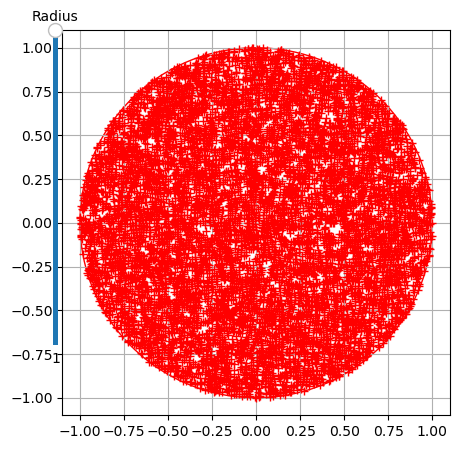

In [10]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)

circle = plt.Circle((0, 0), 1, color='r', fill=False)

xs = lambda r: data_np[:, 0] * r
ys = lambda r: data_np[:, 1] * r

ax.add_patch(circle)
line, = ax.plot(xs(1.), ys(1.), 'r+')
ax.grid(True)

axrad = fig.add_axes([0.1, 0.25, 0.0225, 0.63])

rad_slider = Slider(
    ax=axrad,
    label="Radius",
    valmin=0.,
    valmax=1.,
    valinit=1.,
    orientation="vertical"
)

def update(val):
    line.set_ydata(ys(rad_slider.val))
    line.set_xdata(xs(rad_slider.val))
    fig.canvas.draw_idle()


rad_slider.on_changed(update)

plt.show()